In [26]:
from opt.mc_sim import *
import time
from common.variables import *

In [27]:
import pickle as pkl
from opt.eval_policy import *

filename = "output/msource_value_dic_07-12-2022-04-03-58.pkl"

with open(filename, 'rb') as f:
    output_obj = pkl.load(f)

value_dic = output_obj["state_value_dic"]
model_params = output_obj["model_params"]
sourcingEnv = output_obj["mdp_env"]

In [28]:
sourcingEnv2 = SourcingEnv(
    lambda_arrival = LAMBDA, # or 10
    procurement_cost_vec = np.array([1, 3]),
    supplier_lead_times_vec = np.array([0.8, 0.5]),
    on_times = np.array([1, 1]), 
    off_times = np.array([np.Inf, np.Inf]))

In [29]:
model_params

{'algo_params': {'prob_epsilon': 1e-08,
  'periods': 30,
  'nested_mc_iters': 31,
  'mc_episodes': 30,
  'max_steps': 35,
  'explore_eps': 0.05,
  'debug_bool': 0,
  'fixed_learn_rate': 0.1},
 'policy_params': {'h_cost': 2,
  'b_penalty': 10,
  'small_s': 1,
  'big_s': 2,
  'n_suppliers': 2,
  'backorder_max': -10,
  'inven_limit': 30},
 'mdp_env_params': {'lambda': 50,
  'max_inven': 30,
  'action_size': 4,
  'discount_fac': 1.0,
  'procurement_cost_vec': [45, 5],
  'supplier_lead_times_vec': [0.019, 0.4],
  'on_times': [5, 1],
  'off_times': [0.5, 1]},
 'eval_params': {'safe_factor': 1.1,
  'n_visit_limit': 2,
  'sub_eval_periods': 30,
  'sub_nested_mc_iter': 30},
 'dual_index': {'di_safety_factor': 5, 'delta_cand_range': 20},
 'git_commit': '111729923ac799295dcc8b923bbc46e0c937389e',
 'branch_name': 'larkin/conf-refac'}

In [30]:
output_obj

{'state_value_dic': {'[-1, 0, 0, 1, 1]': (-1571.3216810527374, 290),
  '[0, 0, 0, 0, 1]': (-30.994764685053763, 66),
  '[0, 0, 0, 1, 0]': (-33.63828181465188, 308),
  '[-1, 0, 1, 1, 1]': (-185.54760791602843, 191),
  '[0, 0, 1, 1, 1]': (-122.14509171381722, 172),
  '[0, 0, 1, 0, 1]': (-28.626559139784945, 93),
  '[0, 0, 1, 1, 0]': (-29.68725806451613, 57),
  '[-1, 0, 2, 1, 1]': (-3407.93793416944, 170),
  '[0, 0, 2, 1, 1]': (-55.03781661861101, 151),
  '[0, 0, 2, 0, 1]': (-28.893453118279574, 98),
  '[0, 0, 2, 1, 0]': (-30.072582933010757, 62),
  '[-1, 0, 3, 1, 1]': (-106.8212094537617, 184),
  '[0, 0, 3, 1, 1]': (-29.52121100125581, 146),
  '[0, 0, 3, 0, 1]': (-29.791376989247315, 98),
  '[0, 0, 3, 1, 0]': (-29.723763440860218, 62),
  '[-1, 0, 4, 1, 1]': (-42.01746425289948, 171),
  '[0, 0, 4, 1, 1]': (-30.199647286377857, 146),
  '[0, 0, 4, 0, 1]': (-29.75402362193441, 98),
  '[0, 0, 4, 1, 0]': (-29.76193548387097, 62),
  '[-1, 0, 5, 1, 1]': (-31.140194743225813, 167),
  '[0, 0, 5, 1

In [31]:
# best_small_s, best_big_s, best_val = find_opt_ss_policy_via_mc(sourcingEnv, periods = 20, nested_mc_iters = 50)
# best (s, S) policy found by MC:: (2, 5)

In [32]:
# model_params['branch_name'], model_params['git_commit']

In [33]:
# sourcingEnv = SourcingEnv(
#         lambda_arrival = 8, # or 10
#         procurement_cost_vec = np.array([3, 1, 2]),
#         supplier_lead_times_vec = np.array([0.8, 0.5, 1.0]),
#         on_times = np.array([1, 1, 2]), 
#         off_times = np.array([0.3, 1, 0.2]))

# Dual Sourcing
# sourcingEnv = SourcingEnv(
#         lambda_arrival = LAMBDA, # or 10
#         procurement_cost_vec = np.array([3, 1]),
#         supplier_lead_times_vec = np.array([0.8, 0.5]),
#         on_times = np.array([1, 1]), 
#         off_times = np.array([0.3, 1]))

s_custom = MState(stock_level = 0, 
    n_suppliers = N_SUPPLIERS, 
    n_backorders = np.array([0, 0]), 
    flag_on_off = np.array([1, 1]))

mc_avg_costs_ss = mc_with_policy(sourcingEnv2, start_state = s_custom, 
    periods = 30,
    nested_mc_iters = 100,
    big_s = model_params['policy_params']['big_s'],
    small_s = model_params['policy_params']['small_s'],
    h_cost = model_params['policy_params']['h_cost'],
    b_penalty = model_params['policy_params']['b_penalty'],
    use_tqdm = True)

# print(mc_avg_costs)

100%|██████████| 100/100 [00:00<00:00, 176.54it/s]


In [34]:
# mc_avg_costs = mc_with_ss_policy(sourcingEnv, 
#     periods = 100,
#     nested_mc_iters = 50,
#     big_s = 5,
#     small_s = 2,
#     h_cost = model_params['policy_params']['h_cost'],
#     b_penalty = model_params['policy_params']['b_penalty'])

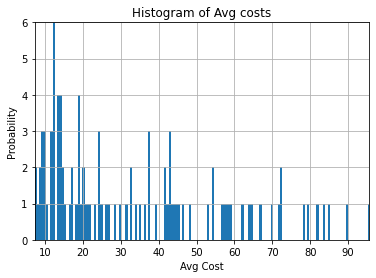

In [35]:
import matplotlib.pyplot as plt
import numpy as np

binwidth = 0.6
n, bins, patches = plt.hist(mc_avg_costs_ss, bins=np.arange( np.min(mc_avg_costs_ss), np.max(mc_avg_costs_ss) + binwidth, binwidth))
# n, bins, patches = plt.hist(mc_avg_costs, density = True)


plt.xlabel('Avg Cost')
plt.ylabel('Probability')
plt.title('Histogram of Avg costs')
plt.xlim(np.min(mc_avg_costs_ss), np.max(mc_avg_costs_ss))
plt.ylim(0, np.max(n))
plt.grid(True)
plt.show()

In [36]:
print(np.mean(np.array(mc_avg_costs_ss)))

33.406


In [37]:
print(np.median(np.array(mc_avg_costs_ss)))

24.65


In [38]:
np.std(np.array(mc_avg_costs_ss))

22.98913094872831

In [39]:
myopic_cost = mc_with_policy(sourcingEnv2, start_state = s_custom, 
    periods = 20,
    nested_mc_iters = 20,
    big_s = model_params['policy_params']['big_s'],
    small_s = model_params['policy_params']['small_s'],
    h_cost = model_params['policy_params']['h_cost'],
    b_penalty = model_params['policy_params']['b_penalty'],
    policy_callback=myopic2_policy,
    use_tqdm = True)

100%|██████████| 20/20 [01:29<00:00,  4.48s/it]


In [40]:
np.mean(myopic_cost)

18.59

In [41]:
mc_avg_costs_di = mc_with_policy(sourcingEnv2, start_state = s_custom, 
    periods = 20,
    nested_mc_iters = 20,
    big_s = model_params['policy_params']['big_s'],
    small_s = model_params['policy_params']['small_s'],
    h_cost = model_params['policy_params']['h_cost'],
    b_penalty = model_params['policy_params']['b_penalty'],
    policy_callback=dual_index_policy,
    use_tqdm = True)

100%|██████████| 20/20 [00:52<00:00,  2.61s/it]


In [42]:
print(np.mean(np.array(mc_avg_costs_di)))

15.419999999999998


In [43]:
print(np.median(np.array(mc_avg_costs_di)))

14.55


In [44]:
np.std(np.array(mc_avg_costs_di))

6.09065677903459

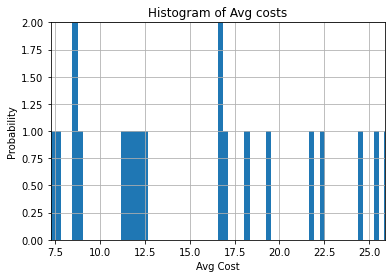

In [45]:
import matplotlib.pyplot as plt
import numpy as np

binwidth = 0.3
n, bins, patches = plt.hist(mc_avg_costs_di, bins=np.arange( np.min(mc_avg_costs_di), np.max(mc_avg_costs_di) + binwidth, binwidth))
# n, bins, patches = plt.hist(mc_avg_costs, density = True)


plt.xlabel('Avg Cost')
plt.ylabel('Probability')
plt.title('Histogram of Avg costs')
plt.xlim(np.min(mc_avg_costs_di), np.max(mc_avg_costs_di))
plt.ylim(0, np.max(n))
plt.grid(True)
plt.show()

In [46]:
single_supplier_mean_costs = []
for s in range(sourcingEnv2.n_suppliers):

    kwargs = {"periods" : 30,
        "nested_mc_iters" : 30,
        "h_cost": model_params['policy_params']['h_cost'],
        "b_penalty" : model_params['policy_params']['b_penalty'],
        "supplier_index": s
    }

    single_supplier_costs = mc_with_policy(sourcingEnv2, start_state = s_custom, 
        use_tqdm = True,
        policy_callback = single_source_orderupto_policy,
        **kwargs)
    
    single_supplier_mean_costs.append(np.mean(single_supplier_costs))


100%|██████████| 30/30 [00:07<00:00,  3.77it/s]


In [47]:
single_supplier_mean_costs

[47.172222222222224, 27.235555555555553]

In [48]:
np.min(single_supplier_mean_costs)

27.235555555555553

In [49]:
eval_steps = 5
mc_eval_iter = 5
eval_costs = mc_eval_policy_perf(sourcingEnv, value_dic, 
    max_steps = eval_steps, 
    mc_iters = mc_eval_iter,
    h_cost = model_params['policy_params']['h_cost'],
    b_penalty = model_params['policy_params']['b_penalty'])

avg_eval_cost = np.mean(eval_costs)

100%|██████████| 5/5 [02:53<00:00, 34.73s/it]


In [50]:
eval_costs_scaled = np.array(eval_costs)/eval_steps
np.mean(eval_costs_scaled)

7.6